In [16]:
# import all the packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
# Read train data 
df = pd.read_csv('gisette_train.data', header=None, delim_whitespace=True)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Checking Null Values
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Length: 5000, dtype: int64

In [28]:
# Read Label Data 
df_label = pd.read_csv('gisette_train.labels', header=None, delim_whitespace=True)
df_label = df_label.iloc[:, 0]
df_label.head(3)

0    1
1   -1
2    1
Name: 0, dtype: int64

In [6]:
# Normalize gisette train data set 
normalize_df = StandardScaler().fit_transform(df)
normalize_df

array([[ 1.54121954, -0.12304076,  0.94149741, ..., -0.13759497,
        -0.41609101,  2.53952425],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       ...,
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076,  2.3929315 , ..., -0.13759497,
        -0.41609101,  2.56402036]])

In [29]:
# Find the shape of the df data
normalize_df.shape

(6000, 5000)

In [30]:
# Find mean and standard deviation of normalized gisette train data
np.mean(normalize_df), np.std(normalize_df)

(-2.17544500931884e-19, 0.9954898291795854)

In [9]:
# generate normalized first two Principal components for visualizetion
gisette_pca=PCA(n_components=2)
gisette_pca_train=gisette_pca.fit_transform(normalize_df )
gisette_pca_train_df=pd.DataFrame(data=gisette_pca_train, columns=['pc_1', 'pc_2'])
gisette_pca_train_df

,pc_1,pc_2
0,27.930781,6.381902
1,18.516389,-9.880967
2,10.245987,-13.195868
3,11.003091,-3.281083
4,-13.678312,-3.768867
...,...,...
5995,-5.267256,7.005394
5996,-10.807280,1.528985
5997,4.001769,-12.656526
5998,-4.213593,-13.101680


In [10]:
# Find the variance explained by first two Principal Component
gisette_pca.explained_variance_ratio_ 

array([0.02883488, 0.02258951])

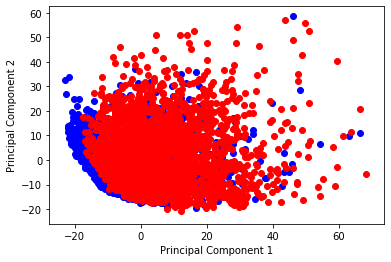

In [13]:
# Plot the label with two major Principal Components 

%matplotlib inline
plt.figure()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = df_label == target
    plt.scatter(gisette_pca_train_df.loc[indicesToKeep, 'pc_1'],
                gisette_pca_train_df.loc[indicesToKeep, 'pc_2'],
                c=color)

There is not a clear separation of the labels along the two axis. It seems there is a lot of overlap. So, the variance explained by these two component might be very low and we would have to use more principal components to get more variance and clearly separate the labels.

In [31]:
#Number of Principal components for the train set
gisette_all_pca_ = PCA().fit(normalize_df) 
#Variance Explained by each Principal Component
evr_gisette_train = gisette_all_pca_.explained_variance_ratio_ 

Text(0, 0.5, '% Variance Explained')

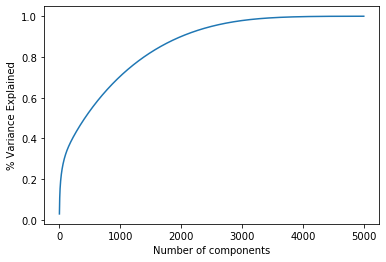

In [32]:
# From the below plot we can see that if we take 2000 dimensions out of 5000, 
# then we are able to retain 90% of the data information. 
# So we can reduce the number of dimensions to 2000 by not loosing much of the information.
plt.plot(np.cumsum(evr_gisette_train))
plt.xlabel('Number of components')
plt.ylabel('% Variance Explained')